<a href="https://colab.research.google.com/github/KandarpChaudhary/Credit_Card_Defaulter_Classifier/blob/main/AML_Project_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Name : Kandarp Chaudhary & Sahil Gupta
### Roll no. : D21016 & D21030
### Problem Statement : 


A bad loan for the bank can lead to a huge financial loss in the event of a defaulter and requires heavy risk-mitigation regarding this issue. Furthermore, the bank loaning process can be quite a manual and tiresome task in identifying who might be a potential defaulter. The loaning process is also quite dependent on the loan processors themselves, leaving a lot of it to subjectivity which might possibly turn into a bad loan in the future.  
  
On the other side, banks can also earn a lot from people who actually pay back their loans. Additionally, they don’t want to be turning people away who could really use that money to get their lives back on track or achieve their dreams (i.e. setting up a business or higher education etc.).

This project aims to bridge this gap of uncertainty by utilizing a data-driven approach by using past data of credit card customers in conjunction with machine learning to predict whether a consumer will default on their credit cards.

### Objective :


The goal behind using this model is to achieve two things:  
•	Bring more consistency to the loaning process.  
•	Investigate what the key drivers are behind a potential defaulter.


### Problem Solving  Approach :


*   Perform a train-test split on the given dataset for model validation post fitting.


1.	Questioning the data - Understanding the variables very carefully and formulating questions/hypothesis. (Note : These are just initial hypothesis which may or may not seem to be true after the EDA step.)

2.	EDA - Exploring the dataset very carefully by doing univariate analysis and bivariate analysis by choosing appropriate graphs, charts and descriptive measures. Reporting the surprising elements. (i.e. the one which were believed would be true in step 1 did not turn out to be true, or a result that was beyond expectation, etc.)

3.	Feature engineering - (A) Suggesting some possible feature transformations (like log(X), sqrt(X), X^2, X1*X2, etc.) with reasons, which could have improved the performances of the previous models.

4.	Feature engineering - (B) Suggesting some new feature generation techniques (e.g.: creating dummy variables, or using one-hot encoding, or transforming an existing feature to a new feature).

5.	Initial model fitting step - Fitting a couple of classification models by considering different sets of predictors on the training dataset. Argue the reasons for considering those predictor sets. Reporting k-fold cross-validation accuracy and confusion matrix. Using the confusion matrix to find the measures of accuracy.

6.	Advanced model fitting step - Using model selection methods (like forward selection or backward elimination methods) to select an appropriate model.

7.	Final model fitting step - Experiment and check if any other classification model can be used to fit the data more accurately. Use any kind of hyperparameter tuning to fit the model. 

8.	Model testing - Consider the best competing models and test their performances on the test data. Reporting the results.


### Attribute Information :

This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.  
There are 25 variables in the dataset :  



|Column Name|Meaning|
|:---|:---|
|ID | ID of each client  |
|LIMIT_BAL | Amount of given credit in NT dollars (includes individual and family/supplementary credit)  |
|SEX | Gender (1=male, 2=female)  |
|EDUCATION | (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)  |
|MARRIAGE | Marital status (1=married, 2=single, 3=others)  |
|AGE | Age in years  |
|PAY_0 | Repayment status in September, 2005 (-2: No consumption or advance payment;  -1: Paid in full; 0: The use of   revolving credit (partial payment); 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment   delay for eight months; 9 = payment delay for nine months and above.)    |
|PAY_2 | Repayment status in August, 2005 (scale same as above)  |
|PAY_3 | Repayment status in July, 2005 (scale same as above)  |
|PAY_4 | Repayment status in June, 2005 (scale same as above)  |
|PAY_5 | Repayment status in May, 2005 (scale same as above)  |
|PAY_6 | Repayment status in April, 2005 (scale same as above)  |
|BILL_AMT1 | Amount of bill statement in September, 2005 (NT dollar) | 
|BILL_AMT2 | Amount of bill statement in August, 2005 (NT dollar)  |
|BILL_AMT3 | Amount of bill statement in July, 2005 (NT dollar)  |
|BILL_AMT4 | Amount of bill statement in June, 2005 (NT dollar)  |
|BILL_AMT5 | Amount of bill statement in May, 2005 (NT dollar)  |
|BILL_AMT6 | Amount of bill statement in April, 2005 (NT dollar)  |
|PAY_AMT1 | Amount of previous payment in September, 2005 (NT dollar)  |
|PAY_AMT2 | Amount of previous payment in August, 2005 (NT dollar)  |
|PAY_AMT3 | Amount of previous payment in July, 2005 (NT dollar)  |
|PAY_AMT4 | Amount of previous payment in June, 2005 (NT dollar)   |
|PAY_AMT5 | Amount of previous payment in May, 2005 (NT dollar)  |
|PAY_AMT6 | Amount of previous payment in April, 2005 (NT dollar)  |
|default payment next month | Default payment (1=yes, 0=no)  |

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import tensorflow
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.express as px

In [ ]:
os.getcwd()

'/content'

In [ ]:
url = "https://raw.githubusercontent.com/KandarpChaudhary/Credit_Card_Defaulter_Classifier/main/Default%20of%20credit%20card%20clients.csv"
data = pd.read_csv(url)   #reading the data from the csv file.
data.shape

(30000, 25)

In [ ]:
data.head().T

,0,1,2,3,4
ID,1,2,3,4,5
LIMIT_BAL,20000,120000,90000,50000,50000
SEX,2,2,2,2,1
EDUCATION,2,2,2,2,2
MARRIAGE,1,2,2,1,1
AGE,24,26,34,37,57
PAY_0,2,-1,0,0,-1
PAY_2,2,2,0,0,0
PAY_3,-1,0,0,0,-1
PAY_4,-1,0,0,0,0


#### Missing Values :

In [ ]:
data.isnull().sum()   #finding the missing values in the data set if any

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


Q1. Significance of each column :   

1 . ID : ID of each client

In [ ]:
len (data.ID.unique())

30000

In [ ]:
data.ID.value_counts().sum()

30000

Here we see that there are 30000 unique ID in the dataset. This implies all the IDs are unique and there is no repetiion of ID.

2. LIMIT_BAL : Amount of given credit in NT dollars (includes individual and family/supplementary credit)

In [ ]:
data.LIMIT_BAL.unique()

array([  20000,  120000,   90000,   50000,  500000,  100000,  140000,
        200000,  260000,  630000,   70000,  250000,  320000,  360000,
        180000,  130000,  450000,   60000,  230000,  160000,  280000,
         10000,   40000,  210000,  150000,  380000,  310000,  400000,
         80000,  290000,  340000,  300000,   30000,  240000,  470000,
        480000,  350000,  330000,  110000,  420000,  170000,  370000,
        270000,  220000,  190000,  510000,  460000,  440000,  410000,
        490000,  390000,  580000,  600000,  620000,  610000,  700000,
        670000,  680000,  430000,  550000,  540000, 1000000,  530000,
        710000,  560000,  520000,  750000,  640000,   16000,  570000,
        590000,  660000,  720000,  327680,  740000,  800000,  760000,
        690000,  650000,  780000,  730000])

Each customer has a different credit limit available.


3. SEX 

In [ ]:
data.SEX.unique()

array([2, 1])

The variable SEX takes 2 values i.e 1 and 2. After finding more about the data set and its attributes we we found that each gender is encoded using either 1 or 2 where 1 = male and 2 = female.

4. EDUCATION

In [ ]:
data.EDUCATION.unique()

array([2, 1, 3, 5, 4, 6, 0])

The variable takes 7 distinct value depending on the Education level of the customers.
These values range from 0 to 6. After finding more about the data set and its attributes we we found that EDUCATION is encoded as below :

| Level | Descripption |
|:---|:---|
| 0 | Uneducated |
| 1 | Graduate School |
| 2 | University |
| 3 | High School |
| 4,5,6 | Others |

5. MARRIAGE

In [ ]:
data.MARRIAGE.unique()

array([1, 2, 3, 0])

In [ ]:
data.PAY_2.unique()

array([ 2,  0, -1, -2,  3,  5,  7,  4,  1,  6,  8])

Initial Hypotheses without doing EDA :

1. If someone is making advance payment, he/she will not default.
2. If someone is continously making partial payments, he/she will default.
3. If someone is utilising high credit limit (84%), he/she will default.
4. Customer with high education level will not default.
5. Customer with maritial status as married will default.
6. Bill amount and Paid amount cannot be less than 0.

In [ ]:
#changing the name from PAY_0 to PAY_1 to make the column names consistent in line with the Bill amount and pay amount.
data.rename(columns={'PAY_0':'PAY_1','default payment next month':'DEFAULT'},inplace = True)

In [ ]:
data.head(1)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1


In [ ]:
df_cat = data.loc[:,['SEX','EDUCATION','MARRIAGE','PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','DEFAULT']]      #categorical columns
df_cont = data.loc[:,['LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']]  #numerical columns

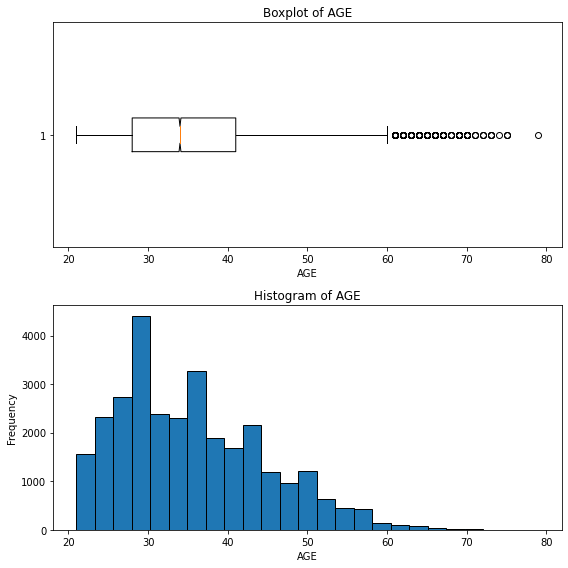

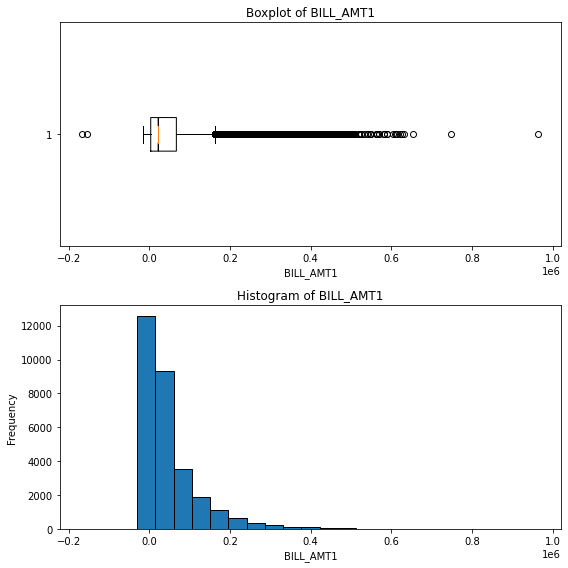

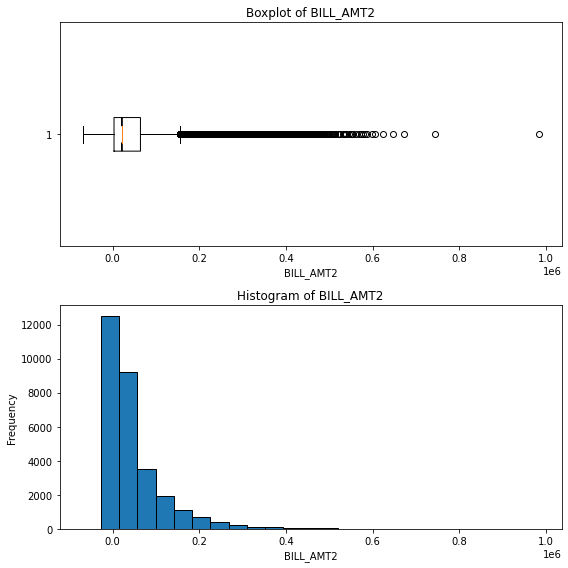

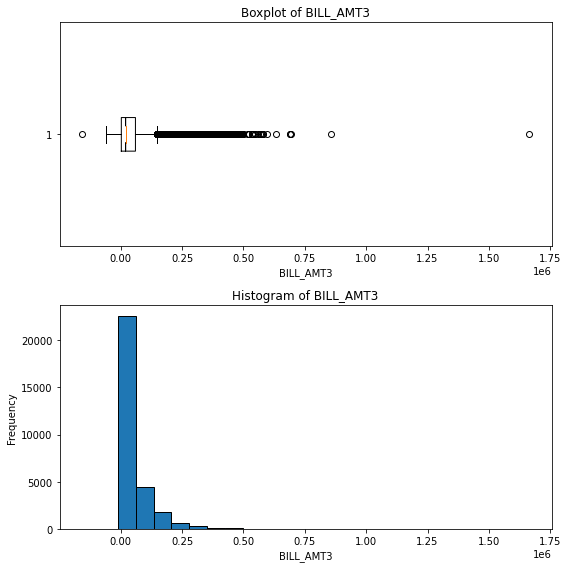

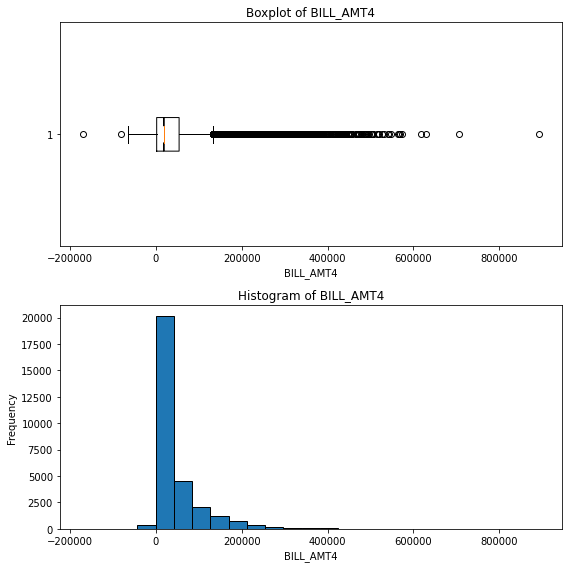

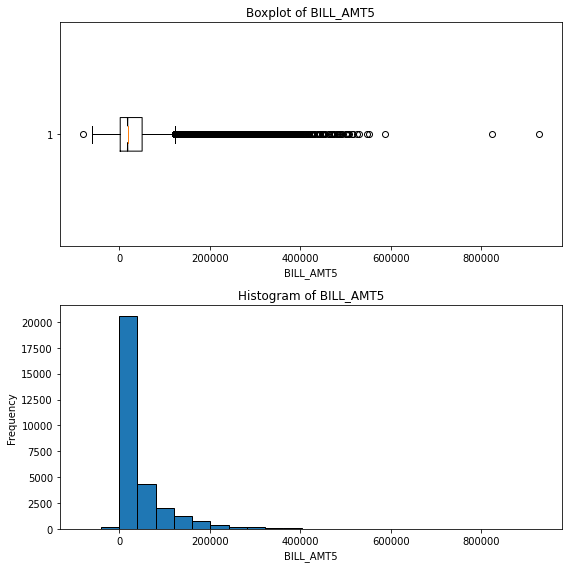

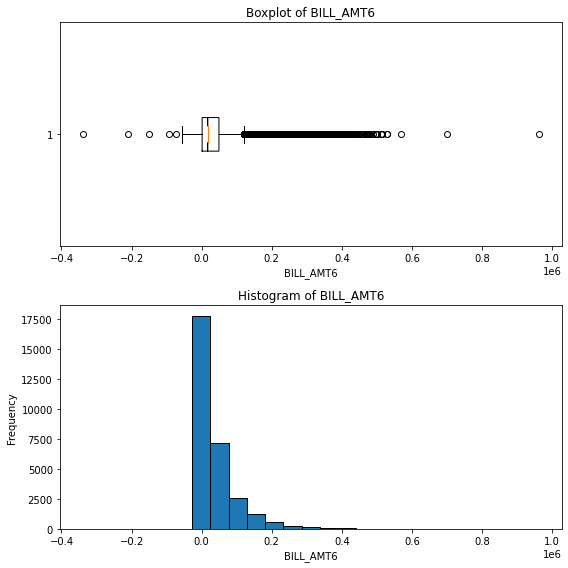

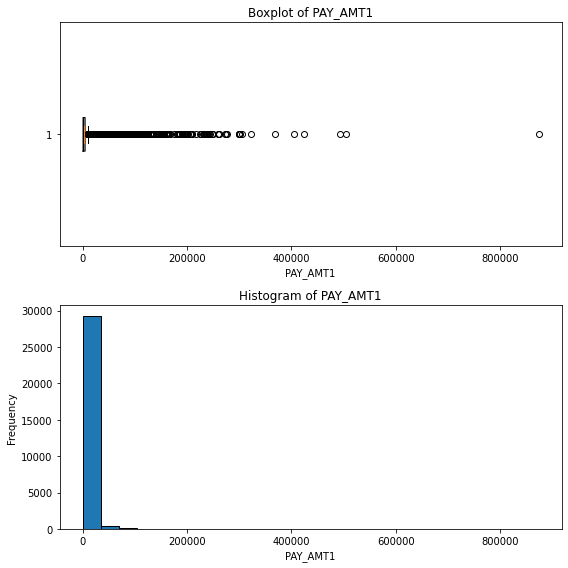

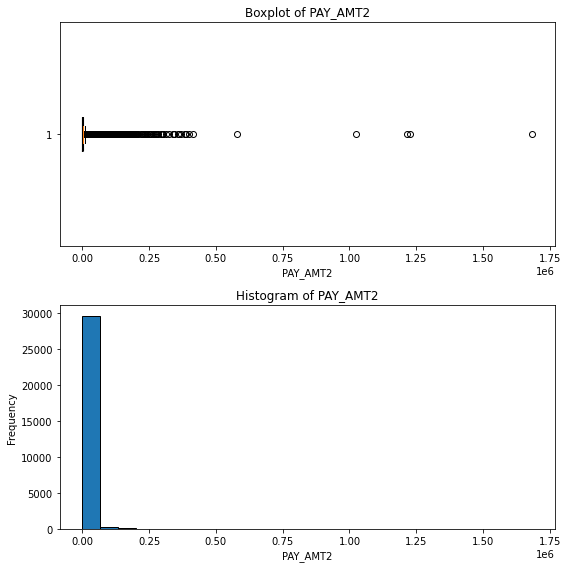

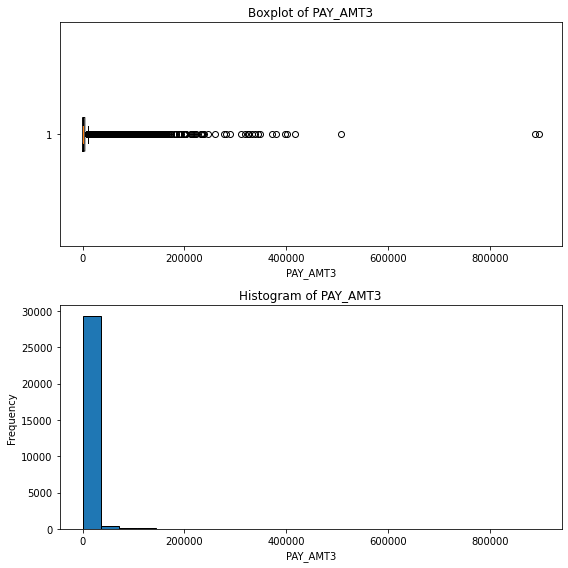

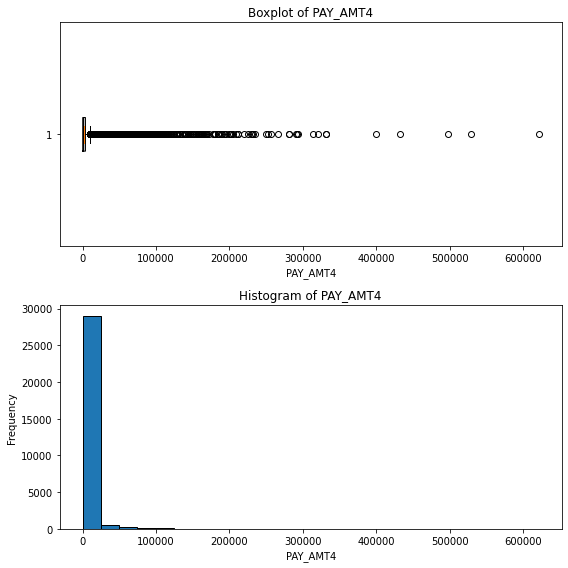

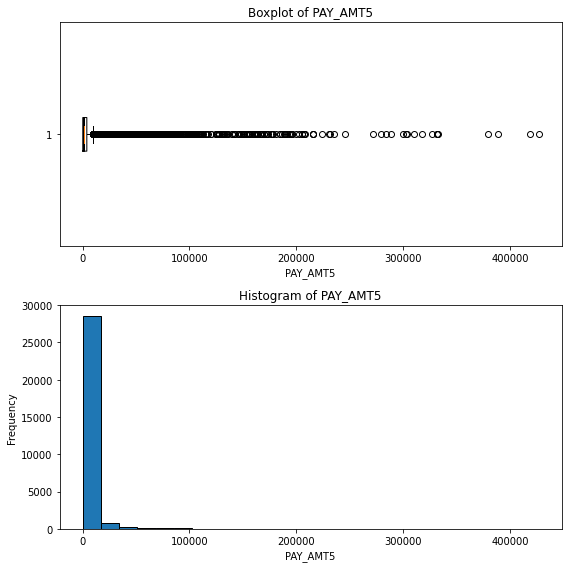

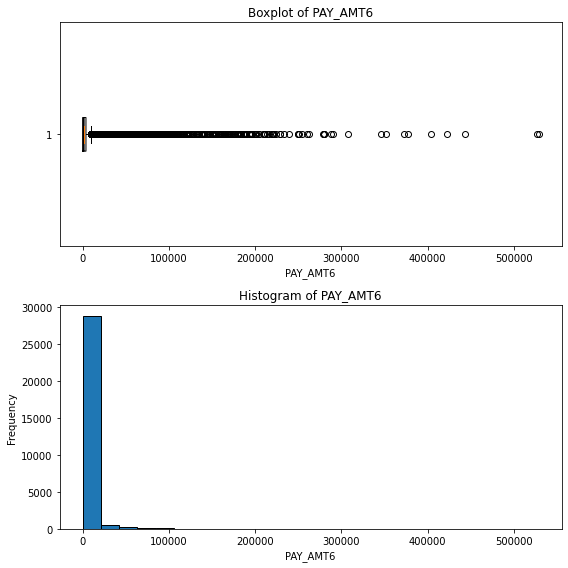

In [ ]:
for i in range(1,len(df_cont.columns)):
    fig = plt.figure(figsize=(8,8),tight_layout = 1)    #plotting a figure
    fig1 = fig.add_subplot(2,1,1)                       #creating subplots to include boxplot and histogram in one image
    plt.boxplot(df_cont.iloc[:,i],vert=0,notch = 1)     #creating the boxplot
    plt.xlabel(df_cont.columns[i])                      #assigning X-axis label
    plt.title('Boxplot of %s'%df_cont.columns[i])       #assigning box plot title
    fig2 = fig.add_subplot(2,1,2)                       #creating subplots to include boxplot and histogram in one image
    plt.hist(df_cont.iloc[:,i],edgecolor = "black", bins = 25) #creating the histogram
    plt.xlabel(df_cont.columns[i])                      #assigning X-axis label
    plt.ylabel('Frequency')                             #assigning Y-axis label
    plt.title('Histogram of %s'%df_cont.columns[i])     #assigning histogram title
    plt.show()

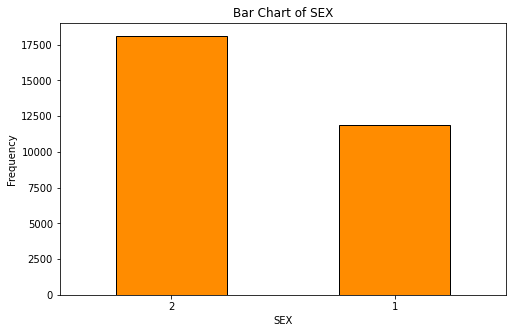

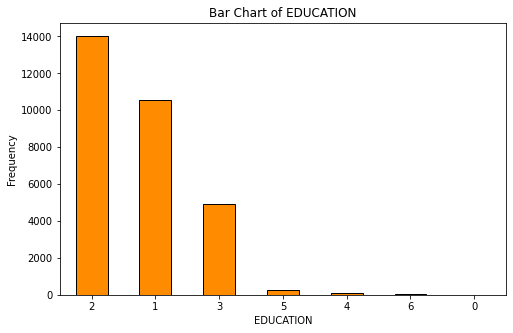

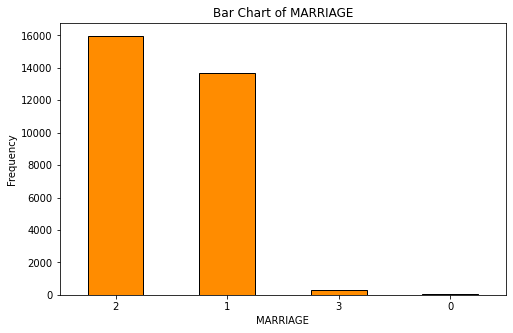

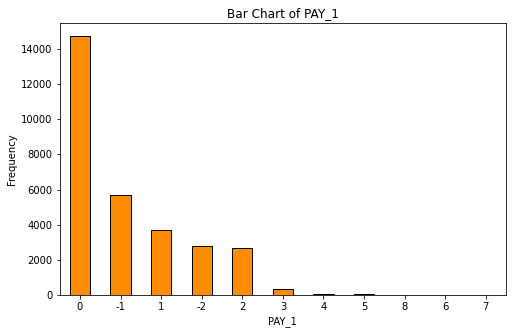

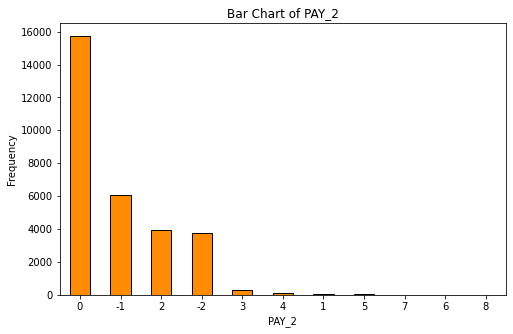

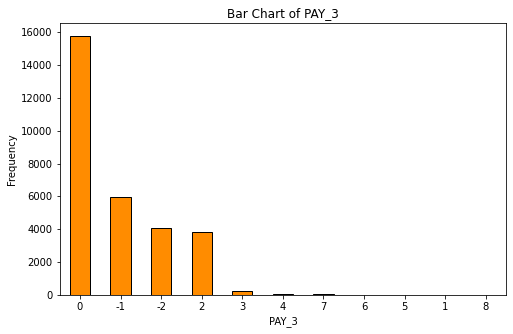

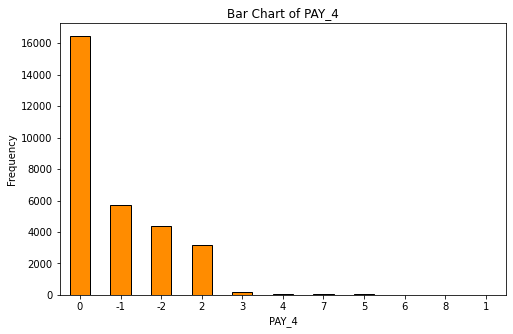

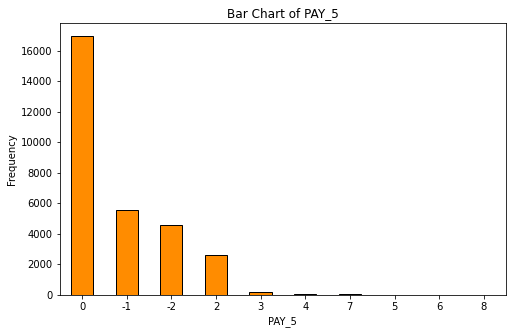

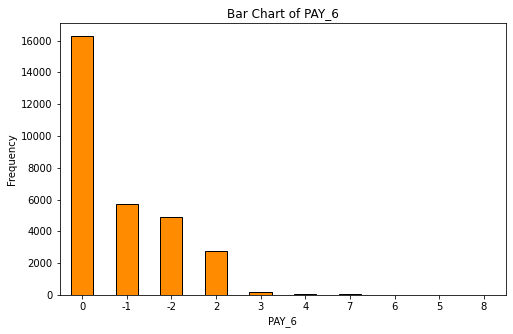

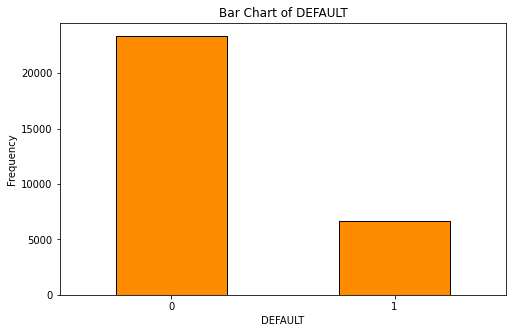

In [ ]:
for i in range(len(df_cat.columns)):
    plt.figure(figsize=(8,5))                           #defining the figure size
    df_cat.iloc[:,i].value_counts().plot(kind='bar', edgecolor='black', color='DarkOrange') #creating the bar chart
    plt.xticks(rotation = 0)                            #making X-axis labels horizontal
    plt.title("Bar Chart of "+df_cat.columns[i])        #assigning histogram title
    plt.xlabel(df_cat.columns[i])                       #assigning X-axis label
    plt.ylabel("Frequency")                             #assigning Y-axis label
    plt.show()

In [ ]:
for i in range(2,len(data.columns) - 20):
    fig = px.histogram(data, x = data.iloc[:,i], color = data.DEFAULT,
                       width=640,
                       height=480)
    fig.update_xaxes(type='category')
    fig.update_layout(
    title="Histogram of " + data.columns[i],
    xaxis_title= data.columns[i],
    yaxis_title="Frequency")
    fig.show()

In [ ]:
fig = px.histogram(data, x = "AGE", color = data.DEFAULT, nbins = 15)
#fig.update_xaxes(type='category')
fig.update_layout(
    title="Plot Title",
    xaxis_title="X Axis Title",
    yaxis_title="Y Axis Title")
fig.show()